# Применение векторных моделей $VAR/VARMA$

1. Выбрать волотильные российские акции (по 3 акции из 2 секторов экономики), таким образом надо в итоге получить две векторные модели (возможно, придется перебрать несколько моделей, чтобы выбрать лучшую), акции надо выбрать так что ряды этих активов должны быть коинтегрированы, построить прогноз на 5, 10 и 20 торговых сессий (сравнить с реальными данными)

2. Выбрать 2 или 3 криптовалюты (так чтобы они были коинтегрированы), построить векторную модель, построить прогноз на 5,10 и 20 торговых сессий (сравнить с реальными данными)


**Активы у всех должны быть разными (надо согласовать между собой самостоятельно)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

Одинаковая длина + формирование датасетов

In [2]:
def check_same_dates(*dfs):
    for i in range(len(dfs)):
        dfs[i][0][dfs[i][1]] = pd.to_datetime(dfs[i][0][dfs[i][1]], format='mixed')
        dfs[i][0].set_index(dfs[i][1], inplace=True, drop=True)

    for i in range(len(dfs)-1):
        for j in range(i+1, len(dfs)):
            d1, d2 = set(dfs[i][0].index.tolist()), set(dfs[j][0].index.tolist())
            print(i, j, d1.symmetric_difference(d2) == set(), d1.symmetric_difference(d2))
            dfs[i][0].drop(d1-d2, inplace=True)
            dfs[j][0].drop(d2-d1, inplace=True)
            d1, d2 = set(dfs[i][0].index.tolist()), set(dfs[j][0].index.tolist())
            print(i, j, d1.symmetric_difference(d2) == set(), d1.symmetric_difference(d2))
    
    res = pd.DataFrame()
    res.index = dfs[0][0].index
    for e in dfs:
        res[e[2]] = e[0][e[3]]
    return res


def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, det_order=1, k_ar_diff=0)
    d = {'0.9':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--' * 20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
    print(' '+'==' * 20)

In [3]:
cntl = pd.read_csv("Telecom_CNTL.csv").iloc[::-1]
mgts = pd.read_csv("Telecom_MGTS.csv").iloc[::-1]
nsvz = pd.read_csv("Telecom_NSVZ.csv").iloc[::-1]

telecom = check_same_dates([nsvz, "Дата", "NSVZ", "Откр."], [cntl, "Дата", "CNTL", "Откр."], [mgts, "Дата", "MGTS", "Откр."]).iloc[130:]
for l in telecom.columns:
    telecom[l] = telecom[l].apply(lambda x: x.replace(".", "").replace(",", ".")).astype(float)

telecom_train = telecom.iloc[:-20]
telecom_test = telecom.iloc[-20:]

telecom.head()

0 1 True set()
0 1 True set()
0 2 True set()
0 2 True set()
1 2 True set()
1 2 True set()


,NSVZ,CNTL,MGTS
Дата,,,
2024-07-11,313.5,10.68,1165.0
2024-08-11,316.5,10.70,1185.0
2024-11-11,318.5,10.82,1185.0
2024-12-11,322.0,11.58,1215.0
2024-11-13,313.5,11.32,1190.0


In [4]:
rbcm = pd.read_csv("Soft_RBCM.csv").iloc[::-1]
svet = pd.read_csv("Soft_SVET.csv").iloc[::-1]
ciandr = pd.read_csv("Soft_CIANDR.csv").iloc[::-1]

soft = check_same_dates([ciandr, "Дата", "CIANDR", "Откр."], [rbcm, "Дата", "RBCM", "Откр."], [svet, "Дата", "SVET", "Откр."])
for i in soft.columns:
    soft[i] = soft[i].apply(lambda x: x.replace(".", "").replace(",", ".")).astype(float)

soft_train = soft.iloc[:-20]
soft_test = soft.iloc[-20:]

soft.head()

0 1 False {Timestamp('2025-02-19 00:00:00'), Timestamp('2025-02-21 00:00:00'), Timestamp('2025-02-25 00:00:00'), Timestamp('2025-11-02 00:00:00'), Timestamp('2025-03-18 00:00:00'), Timestamp('2025-02-24 00:00:00'), Timestamp('2025-04-21 00:00:00'), Timestamp('2025-03-28 00:00:00'), Timestamp('2025-02-13 00:00:00'), Timestamp('2025-04-18 00:00:00'), Timestamp('2025-04-24 00:00:00'), Timestamp('2025-07-03 00:00:00'), Timestamp('2025-06-02 00:00:00'), Timestamp('2025-03-14 00:00:00'), Timestamp('2025-04-15 00:00:00'), Timestamp('2025-04-16 00:00:00'), Timestamp('2025-04-17 00:00:00'), Timestamp('2025-06-03 00:00:00'), Timestamp('2025-02-20 00:00:00'), Timestamp('2025-03-04 00:00:00'), Timestamp('2025-03-17 00:00:00'), Timestamp('2025-10-03 00:00:00'), Timestamp('2025-03-03 00:00:00'), Timestamp('2025-11-03 00:00:00'), Timestamp('2025-02-18 00:00:00'), Timestamp('2025-04-23 00:00:00'), Timestamp('2025-03-31 00:00:00'), Timestamp('2025-09-04 00:00:00'), Timestamp('2025-07-02 00:00:00'), Tim

,CIANDR,RBCM,SVET
Дата,,,
2024-04-27,976.0,22.00,27.40
2024-04-29,982.0,22.89,27.35
2024-04-30,974.2,22.55,27.20
2024-02-05,964.2,22.10,27.10
2024-03-05,964.4,22.61,27.20


In [5]:
doge = pd.read_csv("Dogecoin.csv", sep=";").iloc[::-1]
card = pd.read_csv("Cardano.csv", sep=";").iloc[::-1]
ondo = pd.read_csv("Ondo.csv", sep=";").iloc[::-1]

crypto = check_same_dates([doge, "timeOpen", "DOGECOIN", "close"], [card, "timeOpen", "CARDANO", "close"], [ondo, "timeOpen", "ONDO", "close"])

crypto_train = crypto.iloc[:-20]
crypto_test = crypto.iloc[-20:]

crypto.head()

0 1 True set()
0 1 True set()
0 2 True set()
0 2 True set()
1 2 True set()
1 2 True set()


,DOGECOIN,CARDANO,ONDO
timeOpen,,,
2024-04-28 00:00:00+00:00,0.146699,0.460474,0.773828
2024-04-29 00:00:00+00:00,0.143492,0.457365,0.782153
2024-04-30 00:00:00+00:00,0.133327,0.440812,0.744773
2024-05-01 00:00:00+00:00,0.130134,0.449866,0.769117
2024-05-02 00:00:00+00:00,0.132106,0.458282,0.805286


Коинтегрированность (90% трёх из бОльшего числа, на 95% сложно подобрать).

In [6]:
cointegration_test(telecom_train)
cointegration_test(soft_train)
cointegration_test(crypto_train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
NSVZ   ::  49.86     > 35.0116   =>   True
CNTL   ::  21.39     > 18.3985   =>   True
MGTS   ::  5.23      > 3.8415    =>   True
Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CIANDR ::  76.3      > 35.0116   =>   True
RBCM   ::  39.1      > 18.3985   =>   True
SVET   ::  11.0      > 3.8415    =>   True
Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
DOGECOIN ::  43.04     > 35.0116   =>   True
CARDANO ::  18.73     > 18.3985   =>   True
ONDO   ::  5.62      > 3.8415    =>   True


Преобразование рядов

In [7]:
full_series = [telecom, soft, crypto]
trainseries = [telecom_train, soft_train, crypto]

In [8]:
def adfuller_test(series, signif=0.05, name=''):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [9]:
for df in trainseries:
    for column in df.columns:
        adfuller_test(df[column], name=column)
        print('='*50)

    Augmented Dickey-Fuller Test on "NSVZ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.4081
 No. Lags Chosen       = 7
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.9087. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "CNTL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5953
 No. Lags Chosen       = 1
 Critical value 1%     = -3.5
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.486. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "MGTS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

In [10]:
for df in range(len(trainseries)):
    trainseries[df] = trainseries[df].diff().dropna()

for df in trainseries:
    for column in df.columns:
        adfuller_test(df[column], name=column)
        print('-'*50)

    Augmented Dickey-Fuller Test on "NSVZ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8895
 No. Lags Chosen       = 6
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0021. Rejecting Null Hypothesis.
 => Series is Stationary.
--------------------------------------------------
    Augmented Dickey-Fuller Test on "CNTL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8815
 No. Lags Chosen       = 4
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
--------------------------------------------------
    Augmented Dickey-Fuller Test on "MGTS" 
    -------------------------------

Теперь всё стационарно.

Прогнозирование и сравнение с тестом.

In [11]:
import warnings
warnings.simplefilter('ignore')

results = []

for train in trainseries:
    print(train.columns)
    print()
    error = 2_000_000
    for p in (5, 10, 15):
        print(p)
        model = VARMAX(train, trend='n', order=(p, 0))
        res = model.fit(disp=False, maxiter=500)
        if res.mle_retvals["converged"] and (res.forecasts_error**2).sum() < error:
            res_model = res
            error = (res.forecasts_error**2).sum()
    results.append(res_model)
    print()

Index(['NSVZ', 'CNTL', 'MGTS'], dtype='object')

5
10
15

Index(['CIANDR', 'RBCM', 'SVET'], dtype='object')

5
10
15

Index(['DOGECOIN', 'CARDANO', 'ONDO'], dtype='object')

5
10
15



Index(['NSVZ', 'CNTL', 'MGTS'], dtype='object')


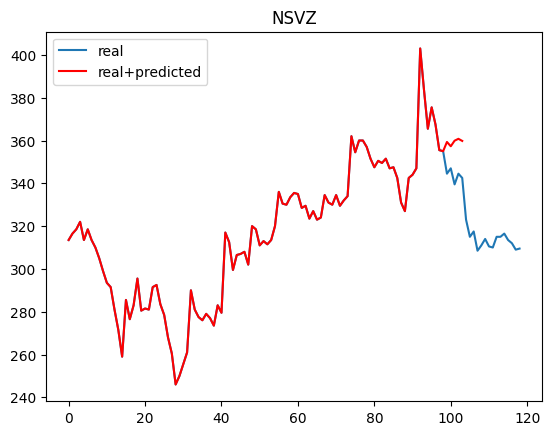

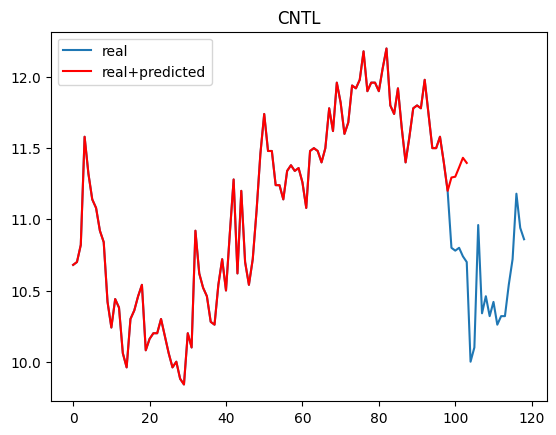

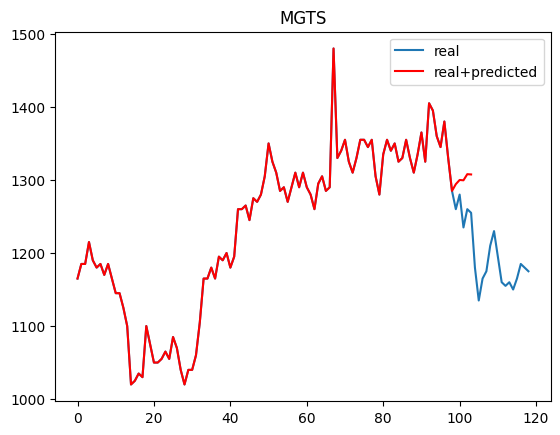

Index(['CIANDR', 'RBCM', 'SVET'], dtype='object')


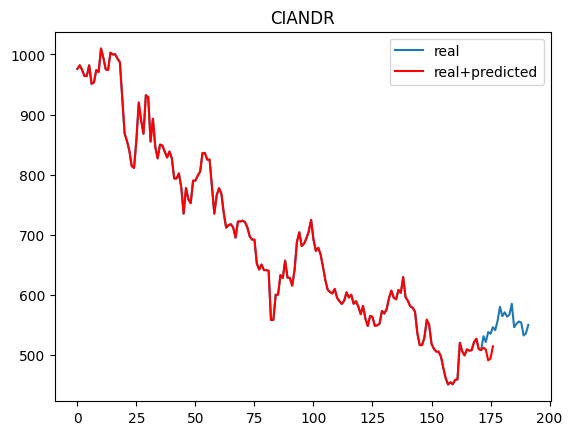

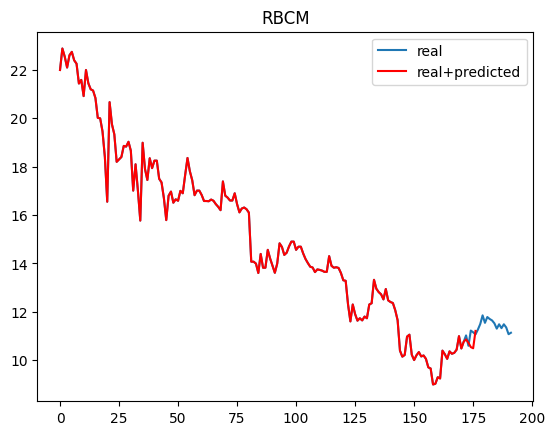

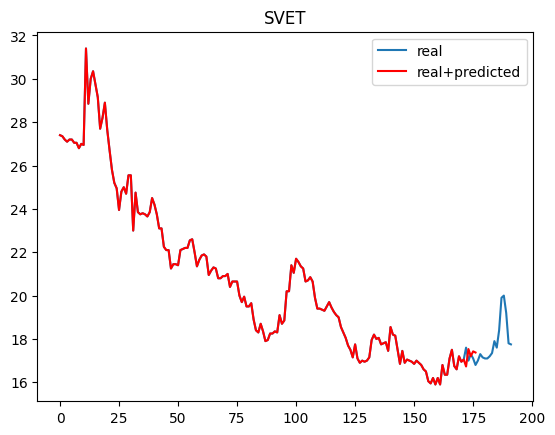

Index(['DOGECOIN', 'CARDANO', 'ONDO'], dtype='object')


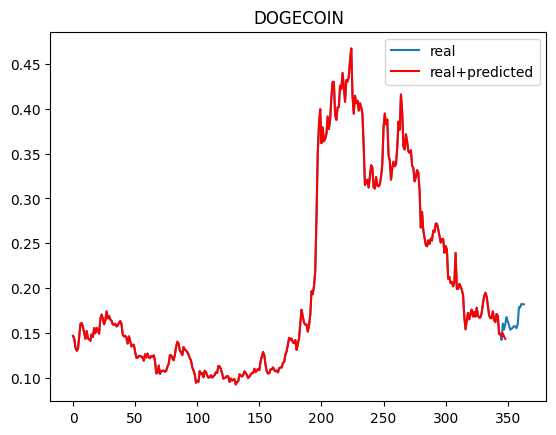

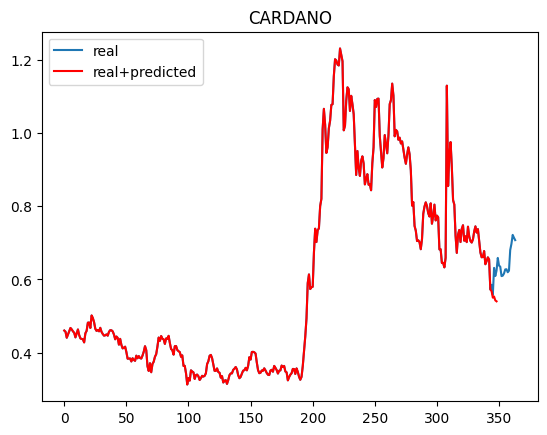

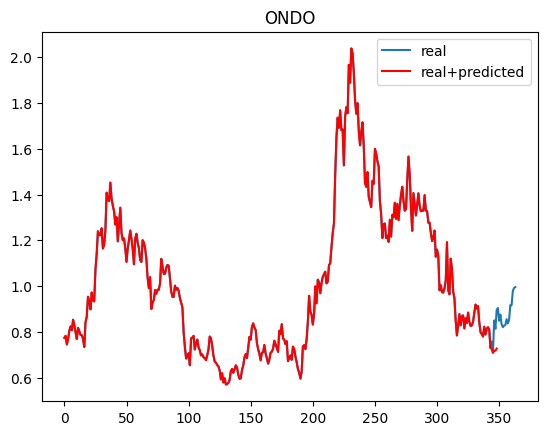

Index(['NSVZ', 'CNTL', 'MGTS'], dtype='object')


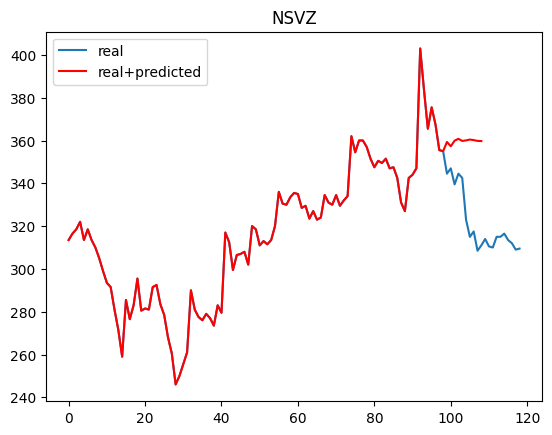

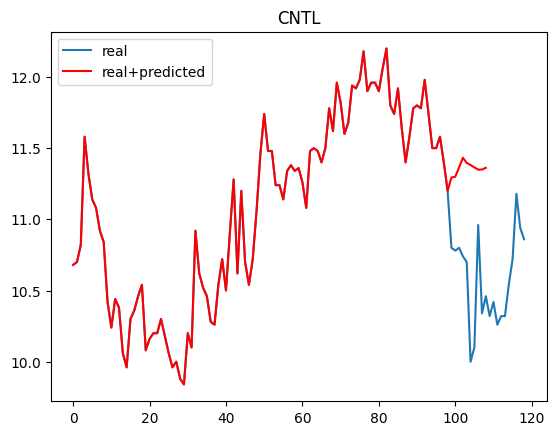

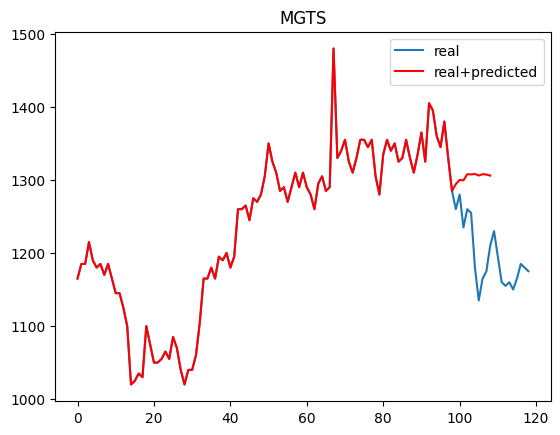

Index(['CIANDR', 'RBCM', 'SVET'], dtype='object')


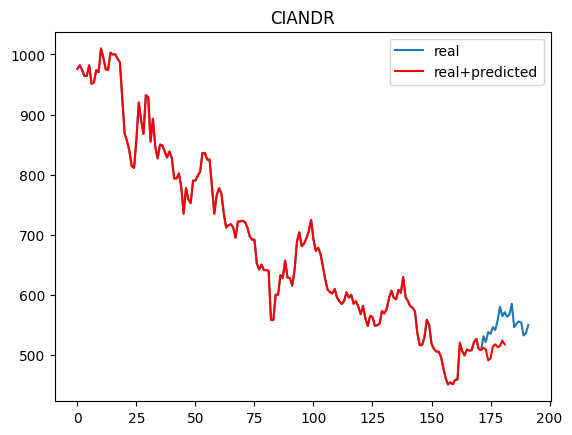

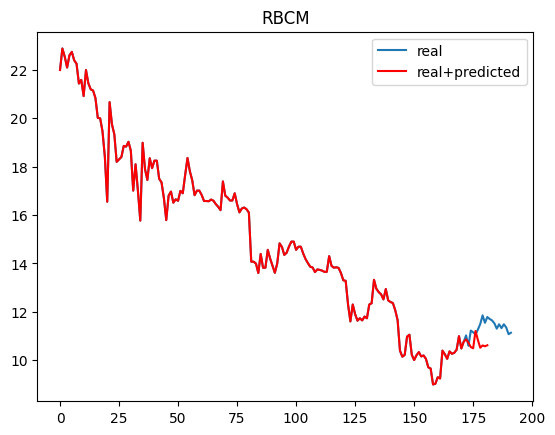

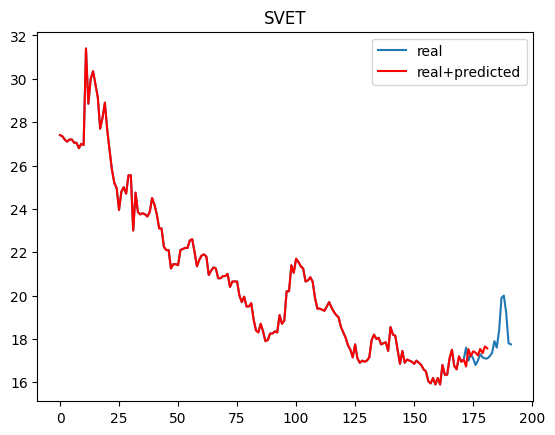

Index(['DOGECOIN', 'CARDANO', 'ONDO'], dtype='object')


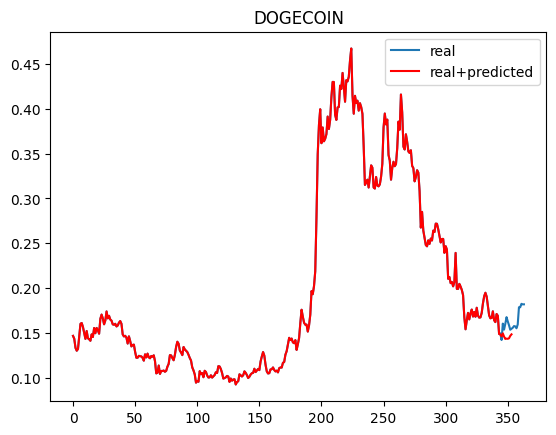

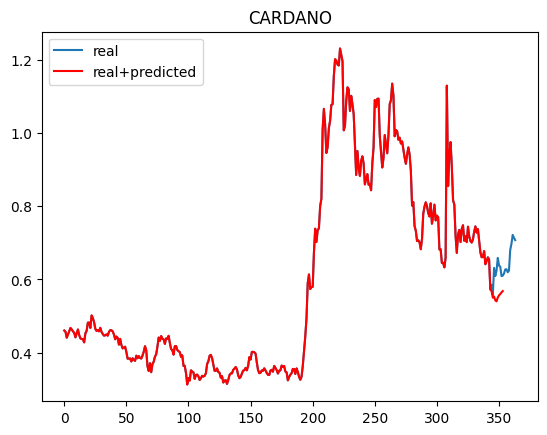

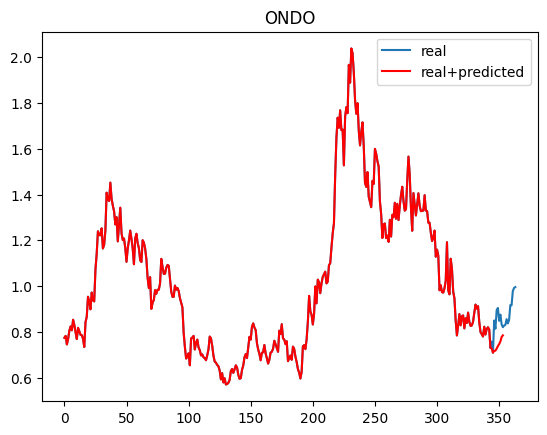

Index(['NSVZ', 'CNTL', 'MGTS'], dtype='object')


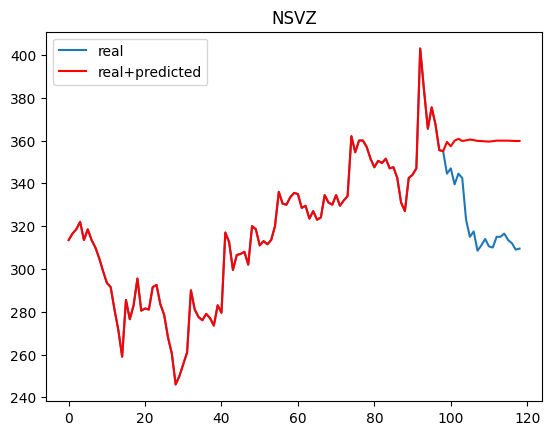

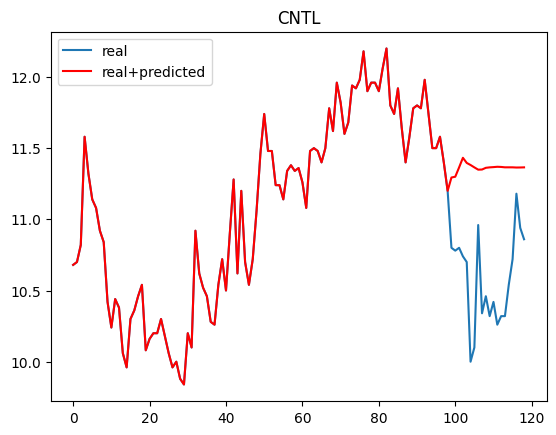

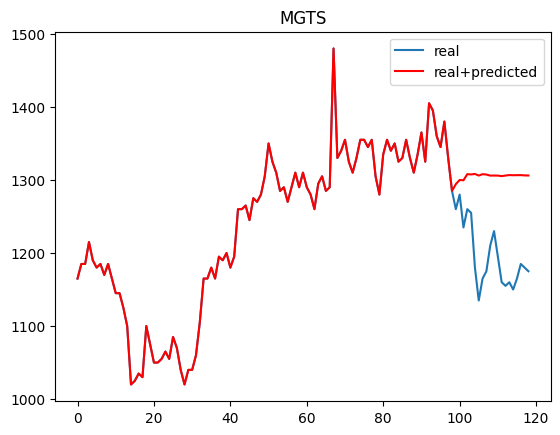

Index(['CIANDR', 'RBCM', 'SVET'], dtype='object')


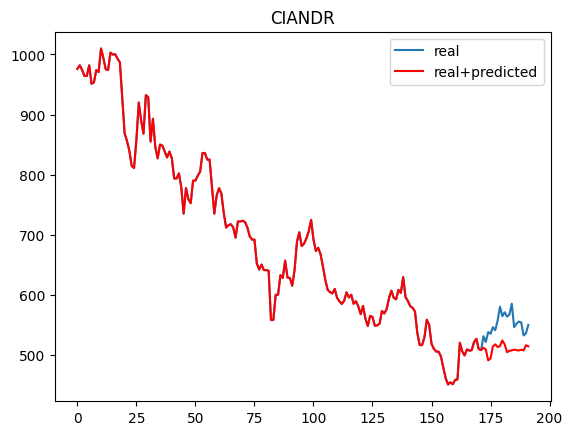

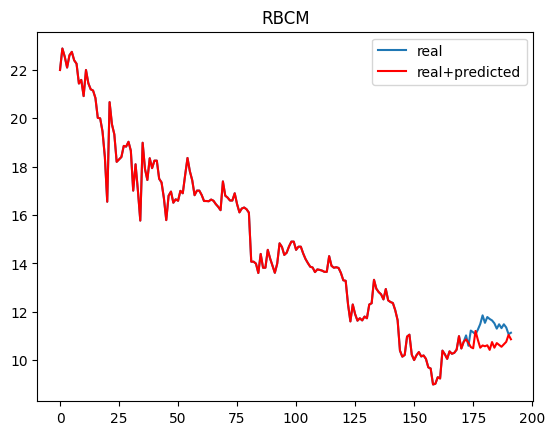

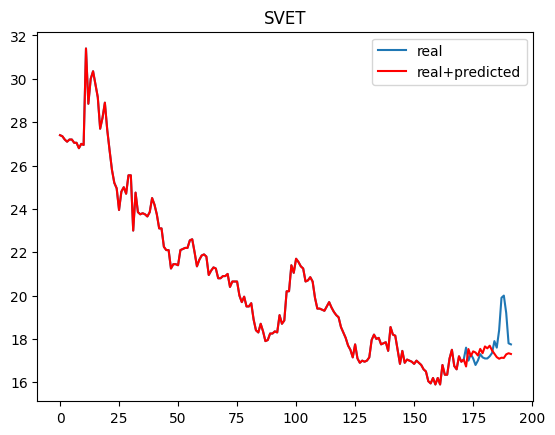

Index(['DOGECOIN', 'CARDANO', 'ONDO'], dtype='object')


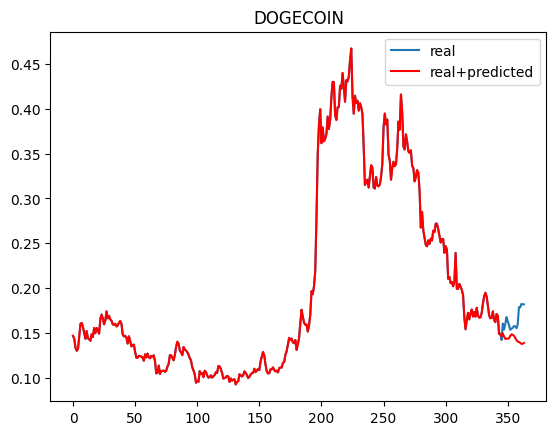

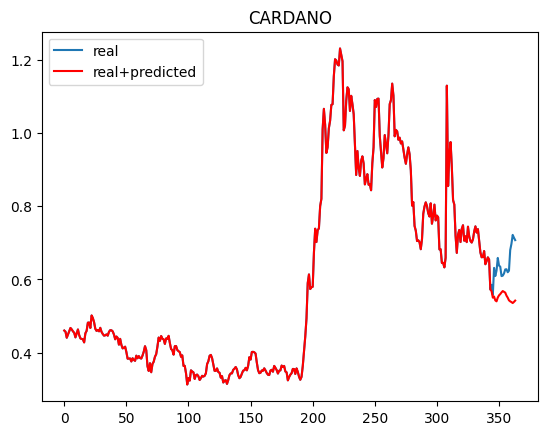

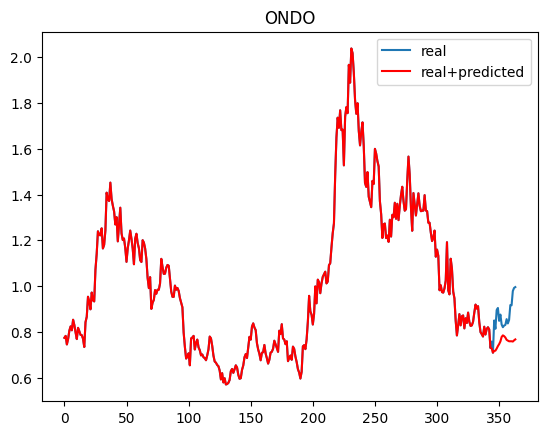

In [13]:
starts = [a.iloc[-21].values for a in full_series]

for lags in (5, 10, 20):
    forecasts = []
    for i, result in enumerate(results):
        print(trainseries[i].columns)
        pred = result.forecast(steps=lags).values.cumsum(axis=0) + starts[i]
        train_pred = np.vstack([full_series[i].iloc[:-20].values, pred])
        full = full_series[i].values
        for j in range(len(trainseries[i].columns)):
            plt.plot(full[:, j], label="real")
            plt.plot(train_pred[:, j], color="red", label="real+predicted")
            plt.legend()
            plt.title(trainseries[i].columns[j])
            plt.show()